# machine learning for credit scoring


Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


Read the data into Pandas 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [3]:
# 了解数据集的维度
data.shape

(112915, 11)

In [4]:
# 了解数据集的统计信息
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112915.000000,112915.000000,108648.000000,112915.000000,112915.000000,1.129150e+05,112915.000000,112915.000000,112915.000000,112915.000000,108648.000000
mean,0.067449,5.825057,51.361304,0.378807,0.306221,6.959809e+03,8.675561,0.213594,1.015587,0.188531,0.856574
std,0.250799,254.976948,14.453571,3.521621,0.222926,1.478193e+04,5.124575,3.489531,1.080925,3.472207,1.149537
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034371,41.000000,0.000000,0.133458,3.637000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.173016,51.000000,0.000000,0.278272,5.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.570906,62.000000,0.000000,0.440113,8.416000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,0.999909,3.008750e+06,57.000000,98.000000,29.000000,98.000000,20.000000


- SeriousDlqin2yrs

灰度柱状图查看下label类型的分布:

可以看到样本在此label分类下，非常不均等。

<Axes: xlabel='SeriousDlqin2yrs', ylabel='count'>

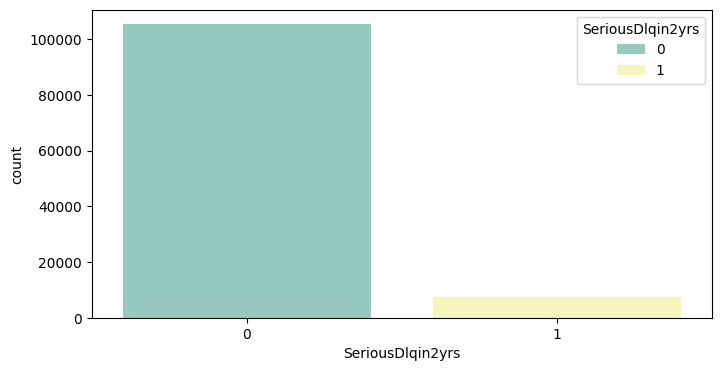

In [7]:
# 灰度柱状图查看下label类型的分布
plt.figure(figsize=(8,4))
sns.countplot(x="SeriousDlqin2yrs", data=data, hue="SeriousDlqin2yrs", palette="Set3", ) # 灰度柱状图

- Drop na

In [8]:
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [9]:
data.dropna(inplace=True)
data.shape

(108648, 11)

In [10]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


- Create X and y

In [11]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [12]:
y.mean()

0.06742876076872101

# 练习1

把数据切分成训练集和测试集

In [13]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
import numpy as np
%matplotlib inline

if Version(sklearn_version) < '0.18': # 版本的不同，函数的位置不太一样
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
# 训练集和测试集的切分：
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0) # random_state 随机切分的标记

/tmp/ipykernel_243507/147082206.py:7: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18': # 版本的不同，函数的位置不太一样


In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(76053, 10)
(32595, 10)
(76053,)
(32595,)


# 练习2 & 3
使用logistic regression建模，并且输出一下系数，分析重要度。<br>
使用决策树/SVM/KNN...等sklearn分类算法进行分类，尝试了解参数含义，调整不同的参数。

在测试集上进行预测，计算准确度。

- 数据的标准化

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()   # 对数据的每一列做了一个"归一化", 使得每个特征的平均值变为0，方差变成1
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [16]:
print(X_train_std.mean())  # 瞅一眼训练集的平均值
print(X_train_std.std())   # 瞅一眼训练集的方差
print(X_test_std.mean())  # 瞅一眼测试集的平均值
print(X_test_std.std())   # 瞅一眼测试集的方差

-4.295787804590142e-17
1.0
0.0005511241683895228
0.9522960818207552


## 1. Logistic regression

- sklearn.linear_model中LogisticRegression类的参数。默认参数如下： 
 
`class sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)`

- penalty 惩罚项（str，有‘L1’、’L2’可选） 

    - L1：向量中各元素绝对值的和。作用是产生少量的特征，而其他的特征都是0，常用于特征选择； 
    - L2：向量中各个元素平方之和再开根号。作用是选择较多的特征，使他们都趋近于0；


- C值（float，default=1.0） 

目标函数的约束条件：

$s.t. ||w||1<C$

由此可看出 C值越小，则正则化强度越大。
class_weight（dict or ‘balanced’, optional） 
由于逻辑回归的学习方法有很多种：“liblinear”、“lbfgs” “newton-cg”“sag”，部分参数只有特定的方法中才有，所以大家可以用到的时候再查。

- REF:

    0. [逻辑回归（Logistic Regression）](http://lib.csdn.net/article/machinelearning/37592)
    1. [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
    2. [机器学习中的范数规则化之（一）L0、L1与L2范数](http://blog.csdn.net/zouxy09/article/details/24971995)
    3. [sklearn逻辑回归(Logistic Regression,LR)类库使用小结](http://blog.csdn.net/sun_shengyun/article/details/53811483)

In [17]:
from sklearn.linear_model import LogisticRegression
# 初始化模型！
lr = LogisticRegression(C=100.0**40, random_state=0, penalty='l2') 
# 学习吧！
lr.fit(X_train_std, y_train)

y_train_pred = lr.predict(np.array(X_train_std))  # 训练集上的预测！
y_test_pred = lr.predict(np.array(X_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 

from sklearn.metrics import accuracy_score
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred)) # 训练集的正确率
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率
# 斜率
print('Sloop: ' + str(lr.coef_[0])[1:len(str(lr.coef_[0])) - 1])
# 截距
print('Intercept: %.3f' % lr.intercept_)

Misclassified samples in test set: 2154
(accuracy_score) Training accuracy: 0.9331
(accuracy_score) Test accuracy: 0.9339
Sloop: -0.01428302 -0.36429906  1.72892458  0.31210449 -0.11519959 -0.09188134
  1.68983565 -0.1964285  -3.24882741  0.11639198
Intercept: -2.859


/tmp/ipykernel_243507/3314674903.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Intercept: %.3f' % lr.intercept_)


The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the input variables. In mathematical notion, if $\hat{y}$ is the predicted value.

$$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$$

Across the module, we designate the vector w = (w_1,
..., w_p) as coef_ and w_0 as intercept_.

- REF：[Generalized Linear Models](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
- REF：[sklearn中Logistics Regression的coef_和intercept_的具体意义](http://blog.csdn.net/u010099080/article/details/52933430?utm_source=itdadao&utm_medium=referral)

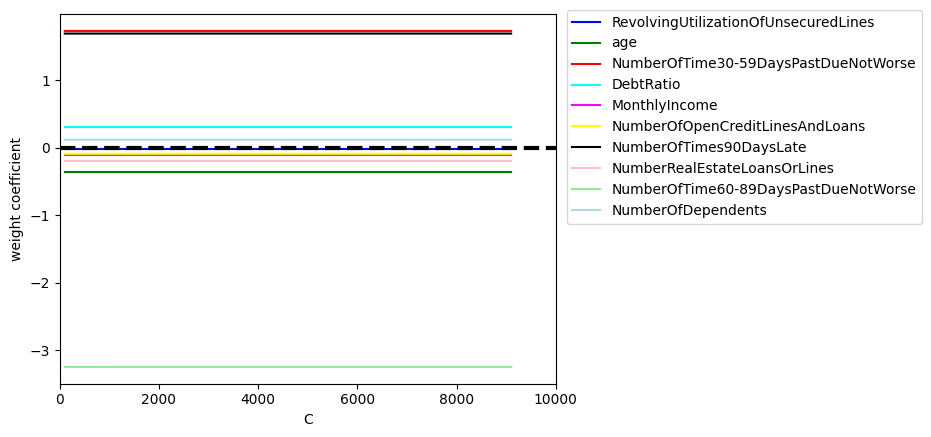

In [18]:
# import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(1, 100, 10):
    lr = LogisticRegression(penalty='l2', C=100.0*c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(100.0*c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=data.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([0, 100*100])
plt.ylabel('weight coefficient')
plt.xlabel('C')
#plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
# plt.savefig('./figures/l1_path.png', dpi=300)
plt.show()

In [19]:
# 输出逻辑回归的系数和截距
lr.get_params()

{'C': 9100.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## 2. 决策树

- 默认参数：

    class sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,min_samples_leaf =1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None,class_weight=None, presort=False)


- criterion:string类型，可选（默认为"gini"）

    衡量分类的质量。支持的标准有"gini"代表的是Gini impurity(不纯度)与"entropy"代表的是information gain（信息增益）。


- splitter:string类型，可选（默认为"best"）

    一种用来在节点中选择分类的策略。支持的策略有"best"，选择最好的分类，"random"选择最好的随机分类。


- max_features:int,float,string or None 可选（默认为None）

    在进行分类时需要考虑的特征数。
    1. 如果是int，在每次分类是都要考虑max_features个特征。
    2. 如果是float,那么max_features是一个百分率并且分类时需要考虑的特征数是int(max_features*n_features,其中n_features是训练完成时发特征数)。
    3. 如果是auto,max_features=sqrt(n_features)
    4. 如果是sqrt,max_features=sqrt(n_features)
    5. 如果是log2,max_features=log2(n_features)
    6. 如果是None，max_features=n_features
    
    注意：至少找到一个样本点有效的被分类时，搜索分类才会停止。


- max_depth:int or None,可选（默认为"None"）

    表示树的最大深度。如果是"None",则节点会一直扩展直到所有的叶子都是纯的或者所有的叶子节点都包含少于min_samples_split个样本点。忽视max_leaf_nodes是不是为None。



- min_samples_split:int,float,可选（默认为2）

    区分一个内部节点需要的最少的样本数。    
    1. 如果是int，将其最为最小的样本数。
    2. 如果是float，min_samples_split是一个百分率并且ceil(min_samples_split*n_samples)是每个分类需要的样本数。
    
    （ceil是取大于或等于指定表达式的最小整数。）


- min_samples_leaf:int,float,可选（默认为1）

    一个叶节点所需要的最小样本数：
    1. 如果是int，则其为最小样本数
    2. 如果是float，则它是一个百分率并且ceil(min_samples_leaf*n_samples)是每个节点所需的样本数。


- min_weight_fraction_leaf:float,可选（默认为0）
    
    一个叶节点的输入样本所需要的最小的加权分数。


- max_leaf_nodes:int,None 可选（默认为None）

    在最优方法中使用max_leaf_nodes构建一个树。最好的节点是在杂质相对减少。如果是None则对叶节点的数目没有限制。如果不是None则不考虑max_depth.


- class_weight:dict,list of dicts,"Banlanced" or None,可选（默认为None）

    表示在表{class_label:weight}中的类的关联权值。如果没有指定，所有类的权值都为1。对于多输出问题，一列字典的顺序可以与一列y的次序相同。
    "balanced"模型使用y的值去自动适应权值，并且是以输入数据中类的频率的反比例。如：n_samples/(n_classes*np.bincount(y))。
    
    对于多输出，每列y的权值都会想乘。
    
    如果sample_weight已经指定了，这些权值将于samples以合适的方法相乘。


- random_state:int,RandomState instance or None

    如果是int,random_state 是随机数字发生器的种子；如果是RandomState，random_state是随机数字发生器，如果是None，随机数字发生器是np.random使用的RandomState instance.


- persort:bool,可选（默认为False）

    是否预分类数据以加速训练时最好分类的查找。在有大数据集的决策树中，如果设为true可能会减慢训练的过程。当使用一个小数据集或者一个深度受限的决策树中，可以减速训练的过程。


- REF:
    - [Scikit-learn中的决策树](http://www.jianshu.com/p/59b510bafb4d)
    - [Python sklearn库中决策树tree.DecisionTreeClassifier()函数参数介绍](http://www.th7.cn/Program/Python/201604/830424.shtml)
    - [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
    - [sklearn.tree.DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train_std, y_train)

y_train_pred = tree.predict(np.array(X_train_std))  # 训练集上的预测！
y_test_pred = tree.predict(np.array(X_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 

from sklearn.metrics import accuracy_score
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred)) # 训练集的正确率
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率

Misclassified samples in test set: 2118
(accuracy_score) Training accuracy: 0.9342
(accuracy_score) Test accuracy: 0.9350


In [21]:
from sklearn.ensemble import ExtraTreesClassifier
# 特征对模型分类重要程度
model = ExtraTreesClassifier()
model.fit(X_train_std,y_train)
print('feature_importances:')
print(model.feature_importances_)

feature_importances:
[0.15501001 0.12786879 0.06715243 0.14897225 0.14910396 0.11066107
 0.09310632 0.0408834  0.05086616 0.05637559]


## 3. 感知器

- 默认参数：

        class sklearn.linear_model.Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=None, tol=None, shuffle=True, verbose=0, eta0=1.0, n_jobs=1, random_state=0, class_weight=None, warm_start=False, n_iter=None)


- n_samples:生成样本的数量


- n_features=2:生成样本的特征数，特征数=n_informative（） + n_redundant + n_repeated


- n_informative：多信息特征的个数


- n_redundant：冗余信息，informative特征的随机线性组合


- n_clusters_per_class ：某一个类别是由几个cluster构成的 


- REF

    - [利用sklearn学习《统计学习方法》](https://zhuanlan.zhihu.com/p/27152953)
    - [sklearn.linear_model.Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [23]:
from sklearn.linear_model import Perceptron
# 初始化一个感知器
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
# 输入数据，学习吧！
ppn.fit(X_train_std, y_train)

y_train_pred = ppn.predict(np.array(X_train_std))  # 训练集上的预测！
y_test_pred = ppn.predict(np.array(X_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 

from sklearn.metrics import accuracy_score
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred)) # 训练集的正确率
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率

Misclassified samples in test set: 4956
(accuracy_score) Training accuracy: 0.8461
(accuracy_score) Test accuracy: 0.8480


## 4. KNN

- 默认参数：

        class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)


- n_neighbors=5        ; int 型参数

    knn算法中指定以最近的几个最近邻样本具有投票权，默认参数为5


- weights='uniform'    ; str参数

    即每个拥有投票权的样本是按什么比重投票，'uniform'表示等比重投票，'distance'表示按距离反比投票，[callable]表示自己定义的一个函数，这个函数接收一个

    距离数组，返回一个权值数组。默认参数为‘uniform’


- algrithm='auto'      ;str参数

    即内部采用什么算法实现。有以下几种选择参数：'ball_tree':球树、'kd_tree':kd树、'brute':暴力搜索、'auto':自动根据数据的类型和结构选择合适的算法。默认情况下是‘auto’。暴力搜索就不用说了大家都知道。具体前两种树型数据结构哪种好视情况而定。KD树是对依次对K维坐标轴，以中值切分构造的树,每一个节点是一个超矩形，在维数小于20时效率最高--可以参看《统计学习方法》第二章。ball tree 是为了克服KD树高维失效而发明的，其构造过程是以质心C和半径r分割样本空间，每一个节点是一个超球体。一般低维数据用kd_tree速度快，用ball_tree相对较慢。超过20维之后的高维数据用kd_tree效果反而不佳，而ball_tree效果要好，具体构造过程及优劣势的理论大家有兴趣可以去具体学习。


- leaf_size=30         ;int参数

    基于以上介绍的算法，此参数给出了kd_tree或者ball_tree叶节点规模，叶节点的不同规模会影响数的构造和搜索速度，同样会影响储树的内存的大小。具体最优规模是多少视情况而定。


- matric='minkowski'   ;str或者距离度量对象

    即怎样度量距离。默认是闵氏距离，闵氏距离不是一种具体的距离度量方法，它可以说包括了其他距离度量方式，是其他距离度量的推广，具体各种距离度量只是参数p的取值不同或者是否去极限的不同情况，具体大家可以参考这里，讲的非常详细    　　　　　　　　　　　　　　　　　　　　　　　　　　　　


- p=2                  ;int参数

    就是以上闵氏距离各种不同的距离参数，默认为2，即欧氏距离。p=1代表曼哈顿距离等等


- metric_params=None   ;距离度量函数的额外关键字参数，一般不用管，默认为None


- n_jobs=1             ;int参数

    指并行计算的线程数量，默认为1表示一个线程，为-1的话表示为CPU的内核数，也可以指定为其他数量的线程，这里不是很追求速度的话不用管，需要用到的话去看看多线程。


- REF
    - [基于scikit-learn包实现机器学习之KNN(K近邻)-完整示例](http://www.cnblogs.com/xiaotan-code/p/6680438.html)
    - [scikit-learn学习之K最近邻算法(KNN)](http://blog.csdn.net/gamer_gyt/article/details/51232210)
    - [sklearn.neighbors.KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

y_train_pred = knn.predict(np.array(X_train_std))  # 训练集上的预测！
y_test_pred = knn.predict(np.array(X_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 

from sklearn.metrics import accuracy_score
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred)) # 训练集的正确率
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率

Misclassified samples in test set: 2205
(accuracy_score) Training accuracy: 0.9409
(accuracy_score) Test accuracy: 0.9324


## 4. SVM

- 默认参数：
    
        class sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)


- C: float参数 默认值为1.0

    错误项的惩罚系数。C越大，即对分错样本的惩罚程度越大，因此在训练样本中准确率越高，但是泛化能力降低，也就是对测试数据的分类准确率降低。相反，减小C的话，容许训练样本中有一些误分类错误样本，泛化能力强。对于训练样本带有噪声的情况，一般采用后者，把训练样本集中错误分类的样本作为噪声。


- kernel: str参数 默认为‘rbf’

    算法中采用的核函数类型，可选参数有：

    - ‘linear’:线性核函数
    - ‘poly’：多项式核函数
    - ‘rbf’：径像核函数/高斯核
    - ‘sigmod’:sigmod核函数
    - ‘precomputed’:核矩阵

还有一点需要说明，除了上面限定的核函数外，还可以给出自己定义的核函数，其实内部就是用你自己定义的核函数来计算核矩阵。


- degree:int型参数 默认为3

    这个参数只对多项式核函数有用，是指多项式核函数的阶数n

    如果给的核函数参数是其他核函数，则会自动忽略该参数。


- gamma：float参数 默认为auto

    核函数系数，只对‘rbf’,‘poly’,‘sigmod’有效。

    如果gamma为auto，代表其值为样本特征数的倒数，即1/n_features.


- coef0:float参数 默认为0.0

    核函数中的独立项，只有对‘poly’和‘sigmod’核函数有用，是指其中的参数c


- probability：bool参数 默认为False

    是否启用概率估计。 这必须在调用fit()之前启用，并且会fit()方法速度变慢。


- shrinking：bool参数 默认为True

    是否采用启发式收缩方式


- tol: float参数  默认为1e^-3

    svm停止训练的误差精度


- cache_size：float参数 默认为200

    指定训练所需要的内存，以MB为单位，默认为200MB。


- class_weight：字典类型或者‘balance’字符串。默认为None

    给每个类别分别设置不同的惩罚参数C，如果没有给，则会给所有类别都给C=1，即前面参数指出的参数C.

    如果给定参数‘balance’，则使用y的值自动调整与输入数据中的类频率成反比的权重。


- verbose ：bool参数 默认为False

    是否启用详细输出。 此设置利用libsvm中的每个进程运行时设置，如果启用，可能无法在多线程上下文中正常工作。一般情况都设为False，不用管它。


- max_iter ：int参数 默认为-1

    最大迭代次数，如果为-1，表示不限制


- random_state：int型参数 默认为None


    伪随机数发生器的种子,在混洗数据时用于概率估计。
    
    

- ★fit()方法：用于训练SVM，具体参数已经在定义SVC对象的时候给出了，这时候只需要给出数据集X和X对应的标签y即可。


- ★predict()方法：基于以上的训练，对预测样本T进行类别预测，因此只需要接收一个测试集T，该函数返回一个数组表示个测试样本的类别。


- ★属性有哪些：

    - svc.n_support_：各类各有多少个支持向量

    - svc.support_：各类的支持向量在训练样本中的索引

    - svc.support_vectors_：各类所有的支持向量



- REF
    - [sklearn-SVC实现与类参数](http://www.cnblogs.com/xiaotan-code/p/6700290.html)
    - [sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [25]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=1.0)
svm.fit(X_train_std, y_train)

SVC(gamma=0.1, random_state=0)

In [26]:
# 预测！
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 2128
Accuracy: 0.93


# 练习4 & 5
查看sklearn的官方说明，了解混淆矩阵等评估标准，并对此例进行评估。

银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。
比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为0.2，再看看这个时候的混淆矩阵等评估指标。

- REF
    - [【scikit-learn】评估分类器性能的度量，像混淆矩阵、ROC、AUC等](http://blog.csdn.net/jasonding1354/article/details/50562543)
    - scikit-learn documentation: [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
    - [ROC曲线-阈值评价标准](http://blog.csdn.net/abcjennifer/article/details/7359370)
    

## 1.  分类准确率（Classification accuracy）


In [27]:
from sklearn.linear_model import LogisticRegression
# 初始化模型！
lr = LogisticRegression(C=100.0**40, random_state=0, penalty='l2') 
# 学习吧！
lr.fit(X_train_std, y_train)

y_test_pred = lr.predict(np.array(X_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 

from sklearn.metrics import accuracy_score
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率
# 斜率
print('Sloop: ' + str(lr.coef_[0])[1:len(str(lr.coef_[0])) - 1])
# 截距
print('Intercept: %.3f' % lr.intercept_)

Misclassified samples in test set: 2154
(accuracy_score) Test accuracy: 0.9339
Sloop: -0.01428302 -0.36429906  1.72892458  0.31210449 -0.11519959 -0.09188134
  1.68983565 -0.1964285  -3.24882741  0.11639198
Intercept: -2.859


/tmp/ipykernel_243507/179908056.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Intercept: %.3f' % lr.intercept_)


**分类准确率**分数是指所有分类正确的百分比。

**空准确率（null accuracy）**是指当模型总是预测比例较高的类别，那么其正确的比例是多少呢？我们来看一下

In [28]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

SeriousDlqin2yrs
0    30424
1     2171
Name: count, dtype: int64

In [29]:
# calculate the percentage of ones
y_test.mean()

0.06660530756250958

In [30]:
# calculate the percentage of zeros
1 - y_test.mean()

0.9333946924374904

In [31]:
# calculate null accuracy(for binary classification problems coded as 0/1)
max(y_test.mean(), 1-y_test.mean())

0.9333946924374904

我们看到空准确率是93.34%，而分类准确率是93.50%，这说明该分类准确率并不是很好的模型度量方法，分类准确率的一个缺点是其不能表现任何有关测试数据的潜在分布。

In [32]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

SeriousDlqin2yrs
0    0.933395
Name: count, dtype: float64

比较真实和预测的类别响应值：

In [33]:
# print the first 25 true and predicted responses
print("True:", y_test.values[30:60])
print("Pred:", y_test_pred[30:60])

True: [0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


从上面真实值和预测值的比较中可以看出，当正确的类别是0时，预测的类别基本都是0；当正确的类别是1时，预测的类别大都不是1。换句话说，该训练的模型大都在比例较高的那项类别的预测中预测正确，而在另外一中类别的预测中预测失败，而我们没法从分类准确率这项指标中发现这个问题。
分类准确率这一衡量分类器的标准比较容易理解，但是它不能告诉你响应值的潜在分布，并且它也不能告诉你分类器犯错的类型。接下来介绍的混淆矩阵可以识别这个问题。

## 2. 混淆矩阵

例：https://en.wikipedia.org/wiki/Receiver_operating_characteristic

![](https://cdn.sa.net/2023/12/20/s8aj9OmtJ5NgqTp.jpg)

- 真阳性（True Positive，TP）：指被分类器正确分类的正例数据
- 真阴性（True Negative，TN）：指被分类器正确分类的负例数据
- 假阳性（False Positive，FP）：被错误地标记为正例数据的负例数据
- 假阴性（False Negative，FN）：被错误地标记为负例数据的正例数据

In [34]:
# IMPORTANT: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[30349    75]
 [ 2079    92]]


In [35]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, y_test_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

TP: 92
TN: 30349
FP: 75
FN: 2079


## 3. 基于混淆矩阵的评估度量

**准确率、识别率（Classification Accuracy）**：分类器正确分类的比例

In [36]:
print((TP+TN) / float(TP+TN+FN+FP))
print(accuracy_score(y_test, y_test_pred))

0.9339162448228255
0.9339162448228255


**错误率、误分类率（Classification Error）**：分类器误分类的比例

In [37]:
print((FP+FN) / float(TP+TN+FN+FP))
print(1-accuracy_score(y_test, y_test_pred))

0.06608375517717441
0.06608375517717446


考虑类不平衡问题，其中感兴趣的主类是稀少的。即数据集的分布反映负类显著地占多数，而正类占少数。故面对这种问题，需要其他的度量，评估分类器正确地识别正例数据的情况和正确地识别负例数据的情况。

**灵敏性（Sensitivity），也称为真正例识别率、召回率（Recall）**：正确识别的正例数据在实际正例数据中的百分比

In [38]:
from sklearn import metrics

print(TP / float(TP+FN))
recall = metrics.recall_score(y_test, y_test_pred)
print(metrics.recall_score(y_test, y_test_pred))

0.04237678489175495
0.04237678489175495


**特效性（Specificity），也称为真负例率**：正确识别的负例数据在实际负例数据中的百分比

In [39]:
print(TN / float(TN+FP))

0.9975348409150671


**假阳率（False Positive Rate）**：实际值是负例数据，预测错误的百分比

In [40]:
print(FP / float(TN+FP))
specificity = TN / float(TN+FP)
print(1 - specificity)

0.0024651590849329476
0.002465159084932944


**精度（Precision）**：看做精确性的度量，即标记为正类的数据实际为正例的百分比

In [41]:
print(TP / float(TP+FP))
precision = metrics.precision_score(y_test, y_test_pred)
print(precision)

0.5508982035928144
0.5508982035928144


**F度量（又称为F1分数或F分数）**，是使用精度和召回率的方法组合到一个度量上


F=2∗precision∗recallprecision+recall  F=2∗precision∗recallprecision+recall

F β =(1+β 2 )∗precision∗recallβ 2 ∗precision+recall  Fβ=(1+β2)∗precision∗recallβ2∗precision+recall


F F度量是精度和召回率的调和均值，它赋予精度和召回率相等的权重。
F β  Fβ度量是精度和召回率的加权度量，它赋予召回率权重是赋予精度的β β倍。

In [42]:
print((2*precision*recall) / (precision+recall))
print(metrics.f1_score(y_test, y_test_pred))

0.07869974337040204
0.07869974337040204


- 总结

混淆矩阵赋予一个分类器性能表现更全面的认识，同时它通过计算各种分类度量，指导你进行模型选择。

使用什么度量取决于具体的业务要求：

垃圾邮件过滤器：优先优化**精度**或者**特效性**，因为该应用对假阳性（非垃圾邮件被放进垃圾邮件箱）的要求高于对假阴性（垃圾邮件被放进正常的收件箱）的要求
    
欺诈交易检测器：优先优化**灵敏度**，因为该应用对假阴性（欺诈行为未被检测）的要求高于假阳性（正常交易被认为是欺诈）的要求

## 4. 调整分类的阈值

In [43]:
# print 10 predicted responses
lr.predict(X_test_std)[60:70]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
y_test.values[60:70]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
# print 10 predicted probabilities of class membership
lr.predict_proba(X_test_std)[60:70, :]

array([[0.93576929, 0.06423071],
       [0.79010738, 0.20989262],
       [0.96497094, 0.03502906],
       [0.94150854, 0.05849146],
       [0.87570263, 0.12429737],
       [0.98558196, 0.01441804],
       [0.94525611, 0.05474389],
       [0.96502878, 0.03497122],
       [0.95264087, 0.04735913],
       [0.95371173, 0.04628827]])

上面的输出中，第一列显示的是预测值为0的百分比，第二列显示的是预测值为1的百分比。

In [46]:
# print 10 predicted probabilities for class 1
lr.predict_proba(X_test_std)[60:70, 1]

array([0.06423071, 0.20989262, 0.03502906, 0.05849146, 0.12429737,
       0.01441804, 0.05474389, 0.03497122, 0.04735913, 0.04628827])

我们看到，预测为1的和实际的类别号差别很大（比如第二个值，预测为1的概率仅为21%，但真实值其是1），所以这里有50%作为分类的阈值显然不太合理。于是我们将所有预测类别为1的百分比数据用直方图的方式形象地表示出来，然后尝试重新设置阈值。

Text(0, 0.5, 'Frequency')

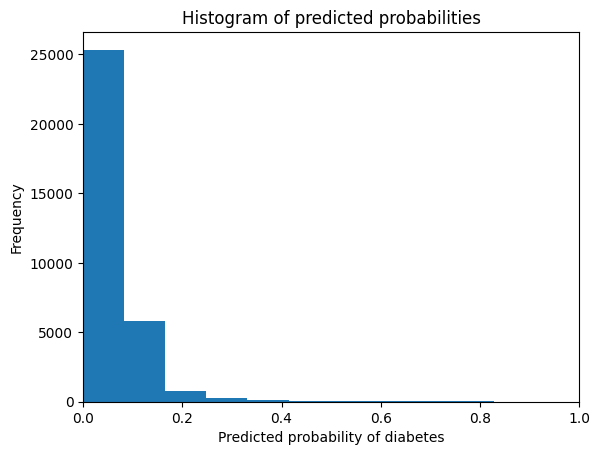

In [47]:
# store the predicted probabilities for class 1
y_pred_prob = lr.predict_proba(X_test_std)[:, 1]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=12)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

我们发现在0%-20%之间的数目远高于50%，故以预测几率50%作为分类阈值时，只有很少的一部分数据会被认为是类别为1的情况。我们可以将阈值调小，以改变分类器的**灵敏度**和**特效性**。

In [49]:
# predict diabetes if the predicted probability is greater than 0.2
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob.reshape(-1, 1), threshold=0.2)[:,0]

# print the 10 predicted probabilities
y_pred_prob[60:70]

array([0.06423071, 0.20989262, 0.03502906, 0.05849146, 0.12429737,
       0.01441804, 0.05474389, 0.03497122, 0.04735913, 0.04628827])

In [50]:
y_pred_class

array([0., 0., 0., ..., 0., 0., 0.])

In [51]:
# print the 10 predicted classes with the lower threshold
y_pred_class[60:70]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [52]:
y_test.values[60:70]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

从上面两组数据对比来看，效果确实改善了点

In [53]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[30349    75]
 [ 2079    92]]


In [54]:
# new confusion matrix (threshold of 0.2)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[29853   571]
 [ 1771   400]]


In [55]:
# sensitivity has increased (used to be 0.0419161676647)
print(400 / float(1771 + 400))
print(metrics.recall_score(y_test, y_pred_class))
# 灵敏度提高了！

0.18424689083371718
0.18424689083371718


In [56]:
# specificity has decreased (used to be 0.997534840915)
print(29853 / float(29853 + 571))

0.9812319221667105


- 总结：

    - 0.5作为阈值时默认的情况
    - 调节阈值可以改变灵敏性和特效性
    - 灵敏性和特效性是一对相反作用的指标
    - 该阈值的调节是作为改善分类性能的最后一步，应更多去关注分类器的选择或构建更好的分类器

## 5. ROC曲线和AUC

ROC曲线指受试者工作特征曲线/接收器操作特性(receiver operating characteristic，ROC)曲线, 是反映灵敏性和特效性连续变量的综合指标,是用构图法揭示敏感性和特异性的相互关系，它通过将连续变量设定出多个不同的临界值，从而计算出一系列敏感性和特异性。

ROC曲线是根据一系列不同的二分类方式（分界值或决定阈），以真正例率（也就是灵敏度）（True Positive Rate,TPR）为纵坐标，假正例率（1-特效性）（False Positive Rate,FPR）为横坐标绘制的曲线。

**ROC观察模型正确地识别正例的比例与模型错误地把负例数据识别成正例的比例之间的权衡。TPR的增加以FPR的增加为代价。ROC曲线下的面积是模型准确率的度量。**

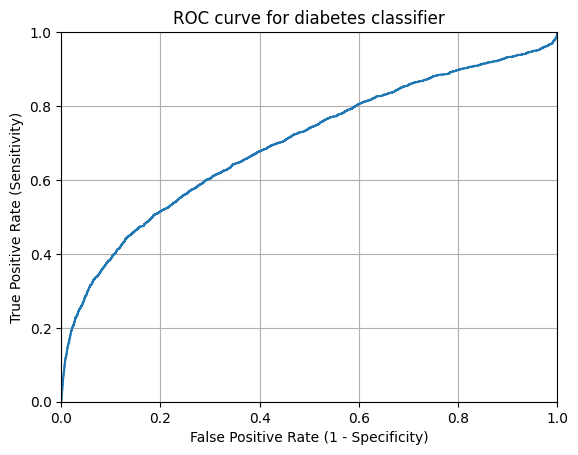

In [57]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC曲线上的每一个点对应于一个threshold，对于一个分类器，每个threshold下会有一个TPR和FPR。 比如Threshold最大时，TP=FP=0，对应于原点；Threshold最小时，TN=FN=0，对应于右上角的点(1,1)

正如上面所述，TPR的增加以FPR的增加为代价，所以ROC曲线可以帮助我们选择一个可以平衡灵敏性和特效性的阈值。通过ROC曲线我们没法看到响应阈值的对应关系，所以我们用下面的函数来查看。

In [58]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

evaluate_threshold(0.5)

Sensitivity: 0.041455550437586364
Specificity: 0.9975348409150671


In [59]:
evaluate_threshold(0.3)

Sensitivity: 0.10548134500230309
Specificity: 0.9926702603207994


AUC（Area Under Curve）被定义为ROC曲线下的面积，也可以认为是ROC曲线下面积占单位面积的比例，显然这个面积的数值不会大于1。又由于ROC曲线一般都处于y=x这条直线的上方，所以AUC的取值范围在0.5和1之间。

**对应AUC更大的分类器效果更好。**所以AUC是衡量分类器性能的一个很好的度量，并且它不像分类准确率那样，在类别比例差别很大的情况下，依然是很好的度量手段。在欺诈交易检测中，由于欺诈案例是很小的一部分，这时分类准确率就不再是一个良好的度量，而可以使用AUC来度量。

In [60]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.6981557778877812


In [61]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(tree, X, y, cv=10, scoring='roc_auc').mean()

0.8126641972738717

# 练习6
尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

## 1. 通过随机森林对特征重要性排序

- 默认参数：

        class sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
        

- 其中关于决策树的参数：

    - criterion: ”gini” or “entropy”(default=”gini”)是计算属性的gini(基尼不纯度)还是entropy(信息增益)，来选择最合适的节点。
    - splitter: ”best” or “random”(default=”best”)随机选择属性还是选择不纯度最大的属性，建议用默认。
    - max_features: 选择最适属性时划分的特征不能超过此值。
    
        当为整数时，即最大特征数；当为小数时，训练集特征数*小数；
        - if “auto”, then max_features=sqrt(n_features).
        - If “sqrt”, thenmax_features=sqrt(n_features).
        - If “log2”, thenmax_features=log2(n_features).
        - If None, then max_features=n_features.

    - max_depth: (default=None)设置树的最大深度，默认为None，这样建树时，会使每一个叶节点只有一个类别，或是达到min_samples_split。
    - min_samples_split:根据属性划分节点时，每个划分最少的样本数。
    - min_samples_leaf:叶子节点最少的样本数。
    - max_leaf_nodes: (default=None)叶子树的最大样本数。
    - min_weight_fraction_leaf: (default=0) 叶子节点所需要的最小权值
    - verbose:(default=0) 是否显示任务进程
    
    
- 关于随机森林特有的参数：

    - n_estimators=10：决策树的个数，越多越好，但是性能就会越差，至少100左右（具体数字忘记从哪里来的了）可以达到可接受的性能和误差率。 
    - bootstrap=True：是否有放回的采样。  
    - oob_score=False：oob（out of band，带外）数据，即：在某次决策树训练中没有被bootstrap选中的数据。多单个模型的参数训练，我们知道可以用cross validation（cv）来进行，但是特别消耗时间，而且对于随机森林这种情况也没有大的必要，所以就用这个数据对决策树模型进行验证，算是一个简单的交叉验证。性能消耗小，但是效果不错。  
    - n_jobs=1：并行job个数。这个在ensemble算法中非常重要，尤其是bagging（而非boosting，因为boosting的每次迭代之间有影响，所以很难进行并行化），因为可以并行从而提高性能。1=不并行；n：n个并行；-1：CPU有多少core，就启动多少job
    - warm_start=False：热启动，决定是否使用上次调用该类的结果然后增加新的。  
    - class_weight=None：各个label的权重。  
    

- 进行预测可以有几种形式：

    - predict_proba(x)：给出带有概率值的结果。每个点在所有label的概率和为1.  
    - predict(x)：直接给出预测结果。内部还是调用的predict_proba()，根据概率的结果看哪个类型的预测值最高就是哪个类型。  
    - predict_log_proba(x)：和predict_proba基本上一样，只是把结果给做了log()处理。  


- REF:

    - [Random Forest（sklearn参数详解)](http://blog.csdn.net/u012102306/article/details/52228516)
    - [使用sklearn--Random Forest参数说明（待补充）](http://www.cnblogs.com/amberdata/p/7203632.html)
    - [使用sklearn进行集成学习——理论](http://www.cnblogs.com/jasonfreak/p/5657196.html)
    - [sklearn.ensemble.RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [62]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = data.columns[1:]

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

In [63]:
forest.fit(X_train_std[:10000,:], y_train[:10000])  # 只取前10000条，大改要5分钟。。。。

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

 1) RevolvingUtilizationOfUnsecuredLines 0.182586
 2) DebtRatio                      0.156865
 3) MonthlyIncome                  0.156118
 4) age                            0.119570
 5) NumberOfOpenCreditLinesAndLoans 0.092041
 6) NumberOfTimes90DaysLate        0.083716
 7) NumberOfTime30-59DaysPastDueNotWorse 0.072023
 8) NumberOfTime60-89DaysPastDueNotWorse 0.049876
 9) NumberOfDependents             0.048309
10) NumberRealEstateLoansOrLines   0.038895


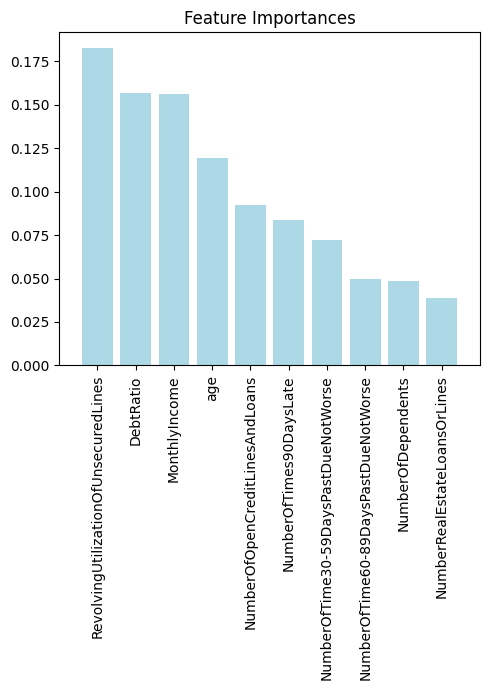

In [64]:
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train_std[:10000,:].shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
    
plt.figure(figsize=(5,7))
plt.title('Feature Importances')
plt.bar(range(X_train_std[:10000,:].shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train_std[:10000,:].shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_std[:10000,:].shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

## 2. Tree-based feature selection

- REF：
    - [特征选择 (feature_selection)](http://www.cnblogs.com/stevenlk/p/6543628.html)
    - [特征选择--scikit-learn](http://blog.csdn.net/a1368783069/article/details/52048349)
    - [sklearn.feature_selection.SelectFromModel](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel)

In [65]:
if Version(sklearn_version) < '0.18':
    X_selected_train_std = forest.transform(X_train_std, threshold=0.15)
    X_selected_test_std = forest.transform(X_test_std, threshold=0.15)
else:
    from sklearn.feature_selection import SelectFromModel
    sfm = SelectFromModel(forest, threshold=0.15, prefit=True)
    X_selected_train_std = sfm.transform(X_train_std)
    X_selected_test_std = sfm.transform(X_test_std)
    
X_selected_train_std.shape

/tmp/ipykernel_243507/1263824737.py:1: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':


(76053, 3)

In [66]:
from sklearn.linear_model import LogisticRegression
# 初始化模型！
lr = LogisticRegression(C=100.0**40, random_state=0, penalty='l2') 
# 学习吧！
lr.fit(X_selected_train_std, y_train)

y_train_pred = lr.predict(np.array(X_selected_train_std))  # 训练集上的预测！
y_test_pred = lr.predict(np.array(X_selected_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 

from sklearn.metrics import accuracy_score
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred)) # 训练集的正确率
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率
# 斜率
print('Sloop: ' + str(lr.coef_[0])[1:len(str(lr.coef_[0])) - 1])
# 截距
print('Intercept: %.3f' % lr.intercept_)

Misclassified samples in test set: 2171
(accuracy_score) Training accuracy: 0.9322
(accuracy_score) Test accuracy: 0.9334
Sloop: -0.00938532  0.19379811 -0.7369265 
Intercept: -2.671


/tmp/ipykernel_243507/155478432.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Intercept: %.3f' % lr.intercept_)


好像测试集的分类准确率略微有点降低了

In [67]:
# IMPORTANT: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[30424     0]
 [ 2171     0]]


In [68]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, y_test_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

TP: 0
TN: 30424
FP: 0
FN: 2171


In [69]:
# 准确率、识别率（Classification Accuracy）：分类器正确分类的比例
print((TP+TN) / float(TP+TN+FN+FP))
print(accuracy_score(y_test, y_test_pred))
# 稍微降低了一点点～

0.9333946924374904
0.9333946924374904


In [70]:
# 错误率、误分类率（Classification Error）：分类器误分类的比例
print((FP+FN) / float(TP+TN+FN+FP))
print(1-accuracy_score(y_test, y_test_pred))
# 变化了一点点～

0.06660530756250958
0.0666053075625096


In [71]:
# 灵敏性（Sensitivity），也称为真正例识别率、召回率（Recall）：正确识别的正例数据在实际正例数据中的百分比
from sklearn import metrics

print(TP / float(TP+FN))
recall = metrics.recall_score(y_test, y_test_pred)
print(recall)

0.0
0.0


In [72]:
# 特效性（Specificity），也称为真负例率：正确识别的负例数据在实际负例数据中的百分比
print(TN / float(TN+FP))

1.0


In [73]:
# 假阳率（False Positive Rate）：实际值是负例数据，预测错误的百分比
print(FP / float(TN+FP))
specificity = TN / float(TN+FP)
print(1 - specificity)

0.0
0.0


In [74]:
# 精度（Precision）：看做精确性的度量，即标记为正类的数据实际为正例的百分比
print(TP / float(TP+FP))
precision = metrics.precision_score(y_test, y_test_pred)
print(precision)

nan
0.0


/tmp/ipykernel_243507/796982091.py:2: RuntimeWarning: invalid value encountered in divide
  print(TP / float(TP+FP))
/root/miniconda3/envs/ictp_ap/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
# F度量（又称为F1分数或F分数），是使用精度和召回率的方法组合到一个度量上
print((2*precision*recall) / (precision+recall))
print(metrics.f1_score(y_test, y_test_pred))

nan
0.0


/tmp/ipykernel_243507/234851050.py:2: RuntimeWarning: invalid value encountered in scalar divide
  print((2*precision*recall) / (precision+recall))


Text(0, 0.5, 'Frequency')

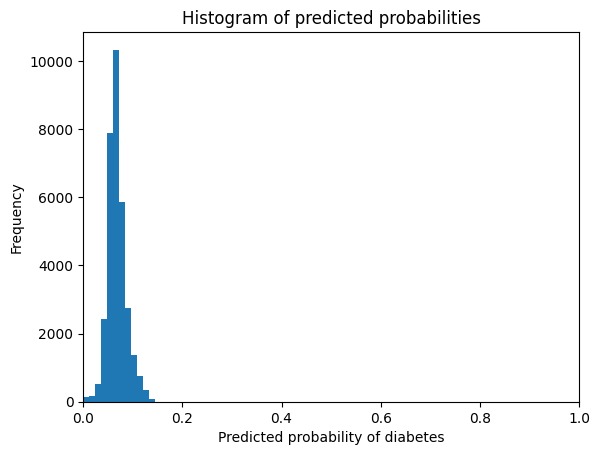

In [76]:
# store the predicted probabilities for class 1
y_selected_pred_prob = lr.predict_proba(X_selected_test_std)[:, 1]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# histogram of predicted probabilities
plt.hist(y_selected_pred_prob, bins=12)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [77]:
# predict diabetes if the predicted probability is greater than 0.2
from sklearn.preprocessing import binarize
y_selected_pred_class = binarize(y_selected_pred_prob.reshape(-1,1), threshold=0.14)[:,0]

In [78]:
# IMPORTANT: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_selected_pred_class))

[[30415     9]
 [ 2171     0]]


In [79]:
# 准确率、识别率（Classification Accuracy）：分类器正确分类的比例
print((TP+TN) / float(TP+TN+FN+FP))
print(accuracy_score(y_test, y_selected_pred_class))
# 似乎很悲剧～ 阈值木有效果。。。

0.9333946924374904
0.9331185764687836
